# Regularization 

## 개요

### 학습 목표

* 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
* L1 regularization과 L2 regularization의 차이를 설명합니다.
* 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

### 목차

1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra: Lp norm
6. Dropout
7. Batch Normalization

## Regularization과 Normalization 설명

### Regularization(정칙화)

* overfitting(과적합)을 해결하기 위한 방법 중 하나.
* L1, L2 Regularization, Dropout, Batch normalization.

### Normalization (정규화)

* 데이터의 형태를 좀 더 의미있게, 트레이닝에 적합하게 전처리하는 과정입니다.
* 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1 사이 값으로 분포를 조정
* Feature의 범위 분포를 동일하게하여 모델이 풀어야 하는 문제를 더 간단하게 바꾸어주는 전처리

### 간단 예제

#### 모듈 불러오기

In [6]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 불러오기

* 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


#### 시각화

* 산점도를 그려봅시다.

/home/aiffel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


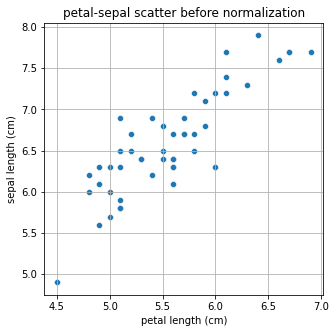

In [8]:
plt.figure(figsize=(5,5))
# plt.scatter(X,Y)
sns.scatterplot(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

#### 정규화 후 시각화

* 이제 0-1로 normalization을 해주는 minmax_scale를 이용해서 산점도를 다시 한번 그려보겠습니다.

/home/aiffel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


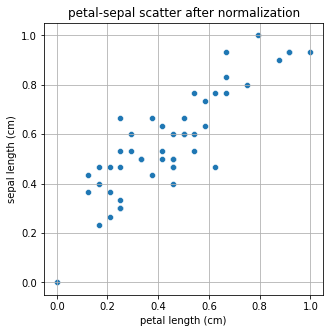

In [10]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
# plt.scatter(X_scale,Y_scale)
sns.scatterplot(X_scale, Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

* X축과 Y축의 범위가 바뀐게 보이십니까?

#### 회귀 문제 풀기

* Linear Regression의 기울기와 절편을 확인합니다. 

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


#### 회귀 시각화

/home/aiffel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/aiffel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


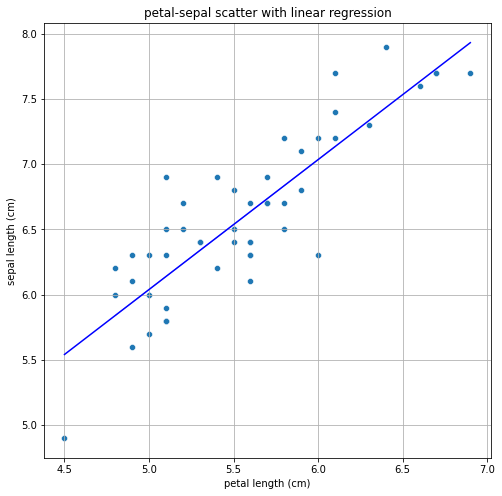

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(X,Y)
# plt.scatter(X,Y)
# plt.plot(X,linear.predict(X.reshape(-1,1)), '-b')
sns.lineplot(X, linear.predict(X.reshape(-1,1)), color = 'blue')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### L1, L2 Regularization

#### L1 = Lasso

기울기 : 0.00, 절편 : 6.59


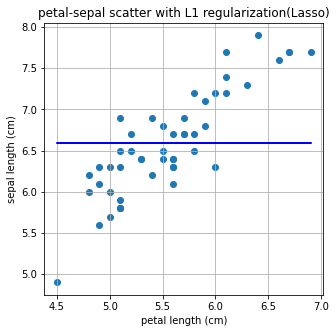

In [28]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

* 기울기가 0이 되는 것을 보니 제대로 구하지 못하는 것 같습니다.

#### L2 = Ridge

기울기 : 0.93, 절편 : 1.41


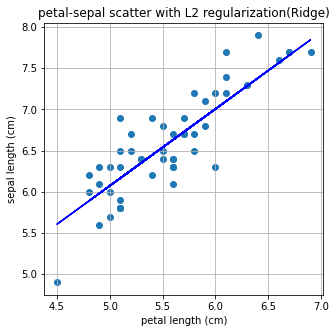

In [29]:
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

* Linear Regression 과 L2 Norm은 관련이 있다.
* 그래서 두 시각화가 비슷하다.

## L1 Regularization

### 정의

$$\hat{\beta}^{lasso} := argmin_{\beta}\frac{1}{2N}\sum_{i=1}^{N}(y_{i} - \beta_{0} - \sum_{j=1}^{p}x_{ij}\beta_{j})^{2} + \lambda\sum_{j=1}^{p}|\beta_{j}|$$

* 중요한 부분은 $\lambda\sum_{j=1}^{p}|\beta_{j}|$ 입니다.
* 이 부분이 없다면 Linear Regressoin 과 동일합니다.
* 해당 부분이 L1이라는 이름이 붙은 이유이며, L2와 차이를 나타내는 부분입니다.

LP norm 수식 (Lp : L1, L2 ...)

$$||x||_{p} := (\sum_{i=1}^{n}|x_{i}|^{p})^{1/p}$$

* p = 1 인 경우, $||x||_{1} := (\sum_{i=1}^{n}|x_{i}|)$ 위의 $\lambda\sum_{j=1}^{p}|\beta_{j}|$ 와 같다.
* 그래서 L1 Regularization 이라 부릅니다.
* 패키지에선 주로 Lasso라고 부릅니다.

### 의문?(문제 있음 그냥 참고용)

* 왜 이전 스텝에서 L1 Regularization만 답이 나오지 않았을까요?

* X = petal length
* Y = sepal length
* N = 50, p = 1
* 선형 회귀
* 위의 식으로 정리하면

* $\beta_{0}$ = 절편
* $\beta_{1}$ = 기울기
* $\lambda$ = regularization parameter

$$\hat{\beta}^{lasso} := argmin_{\beta}\frac{1}{2N}\sum_{i=1}^{N}(y_{i} - \beta_{0} - x_{i}\beta_{1})^{2} + \lambda|\beta_{1}|$$

* 어떤 값이 최소나 최대가 될 경우는 미분 값이 0이 될때 입니다.
* 위 식에서 기울기($\beta1$)에 대한 미분을 하게되면

$$0 = \frac{1}{N}\sum_{i=1}^{N}x_{i}(y_{i} - \beta0 - x_{i}\beta1) + \lambda $$
$$\beta_{0} = \bar{y} - \bar{x}\beta_{1}$$
$$\beta_{1} = \frac{-\beta_{0}\bar{x} + \bar{xy} + \lambda}{\bar{x^{2}}}$$
$$\beta_{0} = \bar{y} - \bar{x}\beta_{1}$$

* p = 1인 경우 $\beta_{0}$ 에 대해 미분하는 과정에서 $\lambda$ 가 사라지므로 Regularization 효과를 볼 수 없습니다.
* X가 1차원 값인 선형회귀분석 같은 경우는 L1 이 의미가 없다.
* 즉, L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 칼럼이 있는 데이터일 때 효과가 있다.

* 위 내용의 수식을 L2에 적용하면 $\beta0$ 이 또 $\lambda$가 없어지므로 다른 사이트 내용을 보자
* [참고](https://yurmu.tistory.com/20)
* 밑의 L2 부분에서 그림으로 표현이 있는데 그걸로 이해하는게 더 쉬울지도 모르겠다.

### L1, L2에 대한 확실한 비교

* L1 = Linear Regression + L1 norm
* L2 = Lieanr Regression + L2 norm
* L1 norm = 
* L2 norm = 

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교

* wine dataset을 이용

In [30]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [31]:
display(wine_df.head(5))
display(target_df.head(5))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,Y
0,0
1,0
2,0
3,0
4,0


* 여러 loss 들을 구해봅시다.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


* L1 Regularization으로 문제를 풀어봅시다.

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


### 결과 분석

* coefficient를 보면 차이를 알 수 있다.
* L1은 7개를 제외하고 0이다.
* Error 부분은 큰 차이가 없지만 어떤 컬럼이 영향을 크게 주는지 알 수 있다.
* 이렇게 error가 크게 차이나지 않는다면 차원 축소와 비슷한 개념으로 7개만 사용해도 될 것이다.
* L1, L2의 차이는 $\alpha$ 라는 하이퍼파라미터(수식에서는 $\lambda$)가 하나 더 들어 간 것, 그 값에 따라 error에 영향을 미침 

## L2 Regularization

### 정의

* L2 Regularization(Ridge)

$$\hat{\beta}^{ridge} := argmin_{\beta}\frac{1}{2N}\sum_{i=1}^{N}(y_{i} - \beta_{0} - \sum_{j=1}^{p})x_{ij}\beta_{j}^{2} + \lambda\sum_{j=1}^{p}\beta_{j}^{2}$$

* L1 Regularization(Lasso)

$$\hat{\beta}^{lasso} := argmin_{\beta}\frac{1}{2N}\sum_{i=1}^{N}(y_{i} - \beta_{0} - \sum_{j=1}^{p}x_{ij}\beta_{j})^{2} + \lambda\sum_{j=1}^{p}|\beta_{j}|$$

* 둘의 차이가 보이시나요?
* $\lambda\sum_{j=1}^{p}\beta_{j}^{2}$ 이 핵심입니다.
* 이전 설명한 LP norm 에서 L2 norm과 동일한 형태입니다.

### L1과 L2 Regularization의 차이점

/home/aiffel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

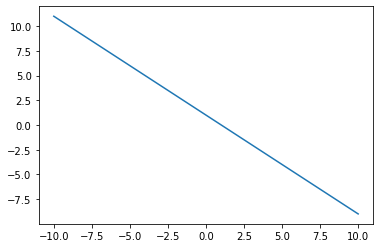

In [76]:
def L1_1(X):
    return -x + 1
def L1_2(X):
    return -x + 1


x = np.arange(-10.0, 10.0, 0.1**3)

# L1_1(x)

sns.lineplot(x,  L1_1(x))